# Lecture 3: Introduction to Probability Theory (Part I)

## Objectives

+ To understand the interprtation of probability theory as a representation of our state of knowledge.
+ To learn about the common sense assumptions that give rise to the basic probability rules.
+ To gain experience with the basic probability rules.

## Readings

+ These notes.
+ [How random is a coin toss, Persi Diaconis, Video by Numberphile](https://youtu.be/AYnJv68T3MM).
+ [Should you catch a tossed coin?, Persi Diaconis, Video by Numberphile](https://youtu.be/Obg7JPd6cmw).
+ [Chapters 1 and 2, Probability Theory: The Logic of Science, E. T. Jaynes](https://bayes.wustl.edu/etj/prob/book.pdf).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import numpy as np

## Probability as a representation of our state of knowledge

Let's call $I$ all the *information* you have a this given moment.
And I am talking about absolutely everything: what your parents taught you, what you learned in school, what you learned in college, what your eyes see right now on some scientific instruments.
Now consider a, well-defined, sentence $A$ that says something about the world.
For example, $A$ could be "The result of the next coin toss John performs will be heads."
Or anything really.
We want a technical machinery that can turn all the information $I$ we have into a real number that tells us how plausible it is that $A$ is true.
This is what probability theory does.
It gives us such a number.
Call it $p(A|I)$ and read it as "the probability that $A$ is true given that we know $I$."
So, probability theory is an attempt to represent our state of knowledge about the world.

## But what about frequencies?

In introductory courses to probability or statistics, we usually learn that the probability of an event is the frequency with each it occurs in nature.
This is absolutely fine if the event is something that indeed occurs repeatedly.
However, this intrepretation is quite restrictive.
In particular, what can we say about an event that can happen only once?
This interpretation forbids the quantification of epistemic uncertainties.
We will expand the interpretation of probability.
It can be shown, see E. T. Jaynes book for the proof, that this interpretation is compatible with the frequency interpretation.
That is, when events occur repeatedly then the probabilities do become frequencies.

## Example: Coin tossing

Let's consider the classic coin tossing example.

![Coin flipping](coin_flipping.png)

The typical interpretation is:

> The probability of heads = the observed frequency of getting heads in repeated random experiments

But in what sense is tossing a coin a truly random process?
As we will show below, it is not at all random.
Newton's laws govern exactly what happens to the coin.
The problem is that we do not know the initial conditions of the coin.
This is a classic example of epistemic uncertainty misrepresented as aleatory uncertainty.
Our intrepretation is:

> The probability of heads = how sure I am about the outcome of a coin toss experiment given all the information I have at the moment



Let's look at the physics of an idealized 2D coin.
Its dynamics can be described by the initial value problem:
$$
\begin{array}{ccc}
\ddot{y} &=& -g,\\
\ddot{\theta} &=& 0,\\
y(0) &=& 0,\\
\theta(0) &=& 0,\\
\dot{y}(0) &=& v_0,\\
\dot{\theta}(0) &=& \omega_0.
\end{array}
$$
Here we have assumed that the coin is always toss vertically from position, $y(0)=0$, while laying flat, $\theta(0)=0$, showing heads.
$y(t)$ measures the vertical distance from the tossing finger, and $\theta(t)$ measures the angle of the coin with respect to the horizontal axis.
$v_0$ is the initial tossing velocity and $\omega_0$ is tossing angular velocity.
$g$ is the acceleration of gravity.

Therefore, the only free parameters that determine the outcome of the coin are $v_0$ and $\omega_0$.

It is trivial to solve this initial value problem. The solution is:
$$
\begin{split}
y(t) &= -\frac{1}{2}gt^2 + v_0t,\\
\theta(t) &= \omega_0t.
\end{split}
$$

Using the first equation, we can find the time $t_1$ at which the coin returns to the hand. That time is:
$$
y(t_1) = 0 \implies t_1 = \frac{2v_0}{g}.
$$

With this result, we can predict the angle the coin makes with the horizontal axis when it returns to the hand. That angle is:
$$
\theta(t_1) = \frac{2v_0\omega_0}{g}.
$$

This angle is enough for predicting the outcome of a tossing experiment.
Specifically, we will get **heads** if
$$
\frac{2v_0\omega_0}{g} (\text{mod}\;2\pi) \in \left(0,\frac{\pi}{2}\right)\cup\left(\frac{3\pi}{2},2\pi\right),
$$
and **tails** if
$$
\frac{2v_0\omega_0}{g} (\text{mod}\;2\pi) \in \left(\frac{\pi}{2},\frac{3\pi}{2}\right).
$$
Note that we have used $\text{mod}\;2\pi$ to find a unique angle between $0$ and $2\pi$.

Now let $X\in\{H,T\}$ be a variable describing the result of the coin toss. We have shown that, conditional on knowning $v_0$ and $\omega_0$ we can predict $X$ exactly. Mathematically, we can write:
$$
X = 
\begin{cases}
T,&\;\text{if}\;\frac{2v_0\omega_0}{g} (\text{mod}\;2\pi) \in \left(\frac{\pi}{2},\frac{3\pi}{2}\right),\\
H,&\;\text{otherwise}.
\end{cases}
$$
Let's draw the corresponding graphical causal model:

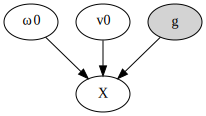

In [2]:
from graphviz import Digraph
gct = Digraph('coin_toss_g')
gct.node('omega0', label='<&omega;<sub>0</sub>>')
gct.node('v0', label='<v<sub>0</sub>>')
gct.node('g', style='filled')
gct.node('X')
gct.edge('g', 'X')
gct.edge('v0', 'X')
gct.edge('omega0', 'X')
gct.render('coin_toss_g', format='png')
gct

## Simulation of a coin toss experiment

A typical human throws the coin with
$$
v_0 \approx 2.5\;\text{m/s},
$$
and
$$
\omega_0 \approx 200\times 2\pi\;\text{rad/s}.
$$
Let us simulate how sensitive is the result on the choice of these parameters.

In [3]:
from scipy.constants import g # acceleration of gravity
# Let us code H as 0 and T as 1.
def X(v0, omega0):
    tmp = (2 * v0 * omega0 / g) % (2. * np.pi) # taking g = 9.8 m/s**2
    if tmp > 0.5 * np.pi and tmp < 1.5 * np.pi:
        return 'T'
    return 'H'

In [4]:
# Try it out here:
v0 = 2.5
omega0 = 200 * 2. * np.pi
print(X(v0, omega0))

H


In [5]:
# Let's do some interactive tests
from ipywidgets import interactive
def print_X(v0, omega0):
    print("X = ", X(v0, omega0))
interactive(print_X, v0=(2., 3., 0.1), omega0=(100*2*np.pi, 1000*2*np.pi, 5))

interactive(children=(FloatSlider(value=2.5, description='v0', max=3.0, min=2.0), FloatSlider(value=3453.31853…

### Questions

+ Play with the interactive tool above moving $v_0$ and $\omega_0$ changing the result of the coin toss experiment. To which of the two parameters is the result of the coin toss most sensitive? 

+ Consider a coin tossing experiment in the moon. Would it be easier or harder to manipulate the result?

+ To describe the dynamics of a real 3D coin you need 6 degrees of freedom. You need three degrees of freedom to describe the center of mass, two degrees of freedom to describe a unit vector pointing towards the instantaneous axis of rotation, and one degree of freedom to describe the angle of rotation. Using the Newton-Euler equations you can write down 6D dynamical system. How many arbitrary initial conditions do you have?

+ List at least three other "random" experiments which are clearly deterministic. You can get inspired by gambling applications.

+ Consider the example of a casino roulette. Discuss with your neighbors and report here. How many degrees of freedom do you need to describe its dynamics? What are the initial conditions that you need to know and what can you use to measure them?

### Rise of uncertainty

As we saw, the outcome of a coin toss experiment is:
$$
X = 
\begin{cases}
T,&\;\text{if}\;\frac{2v_0\omega_0}{g} (\text{mod}\;2\pi) \in \left(\frac{\pi}{2},\frac{3\pi}{2}\right),\\
H,&\;\text{otherwise}.
\end{cases}
$$
Let's think of it as a function of $(v_0,\omega_0)$.
It is obvious that $X$ flips whenever
$$
\frac{2v_0\omega_0}{g} = 2\pi k + \frac{\pi}{2},
$$
for $k=1,2,\dots$, as well as whenever
$$
\frac{2v_0\omega_0}{g} = 2\pi k + \frac{3\pi}{2}.
$$
Let's plot some of these curves in the $v_0-\omega_0$ plane.

Text(0, 0.5, '$\\omega_0$ rad/s')

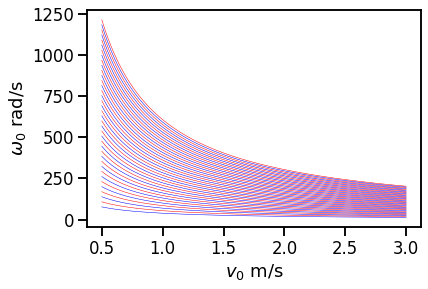

In [6]:
fig, ax = plt.subplots()
v_0 = np.linspace(0.5, 3., 100)
for k in range(1,20):
    omega_01 = 9.8 * (2 * np.pi * k + 0.5 * np.pi) / (2 * v_0)
    omega_02 = 9.8 * (2 * np.pi * k + 1.5 * np.pi) / (2 * v_0)
    ax.plot(v_0, omega_01, 'b', lw=0.5)
    ax.plot(v_0, omega_02, 'r', lw=0.5)
ax.set_xlabel(r'$v_0$ m/s')
ax.set_ylabel(r'$\omega_0$ rad/s')

As we discussed, the uncertainty rises from our inability to perfectly control the initial conditions of the coin toss experiment.
Let us suppose that a typical human throws the coin with an initial velocity:
$$
v_0 = 2.5 \pm 0.2\;\text{m/s},
$$
and an initial angular velocity of
$$
\omega_0 = 400\pi \pm 50\;\text{rad/s}.
$$
For the time being let's interpret the $\pm$ as if it means that all values plus or minus that value are equally likely.

Let us now assume that the experiment is repeated 1,000 times and that each time the initial conditions are drawn randomly.
Then we are going to count the number of times we get an H.
Dividing by the total number of random experiments, we will get the frequency of H's.
The code is given below.

In [7]:
def measure_freq_of_H(v_0_lower=2.3, v_0_upper=2.7, 
                      omega_0_lower=200*np.pi-100, 
                      omega_0_upper=200*np.pi+100,
                      N=10000):
    num_Hs = 0.
    for n in range(N):
        v_0 = np.random.rand() * (v_0_upper - v_0_lower) + v_0_lower
        omega_0 = np.random.rand() * (omega_0_upper - omega_0_lower) + omega_0_lower
        num_Hs += 1 if X(v_0, omega_0) == 'H' else 0
    return num_Hs / N

Let us run this code:

In [8]:
measure_freq_of_H()

0.4928

This is our first Monte Carlo simulation. As we will see in a few lectures, the empirical frequency that we measure this way converges to the probability of the coin turning out heads in the limit of $N\rightarrow\infty$.
This is known as the *law of large numbers*.

### Questions

+ Run ``measure_freq_of_H()`` two or three times. What do you observe?
+ If our assumptions about the physics of the coin toss are correct, then the frequency we get from the Monte Carlo should be very close to the probability of getting heads. That should be very close to 0.5. The Stanford statistician Persi Diaconis claims that he is able to get any outcome he likes from a coin toss experiment. In what regime of the initial condition space do you think he operates? Remember that: 1) he needs to be able to control for the outcome; but 2) he also needs to full you that the is throwing the coin regularly.

## The common sense assumptions that give rise to the basic probability rules.

> Probability theory is nothing but common sense reduced to calculation. Pierre-Simon Laplace, Théorie analytique des probabilités (1814)

Consider the following three ingedients:
+ A: a logical sentence
+ B: another logical sentence
+ I: all the information we know

No other restriction apart that A and B are not contradictions.

We need a bit of notation so that we write less math:

+ $\text{not}\;A \equiv \neg A$
+ $A\;\text{and}\;B \equiv A, B \equiv AB$
+ $A\;\text{or}\;B \equiv A+B$

Now, let's try to make a robot that can argue under uncertainty.
It should be able to take logical sentences (such as $A$ and $B$ above) and argue about them using all the information it has.
What sort of system should govern this robot.
The following desiderata seem reasonable:

+ Degrees of plausibility are represented by real numbers.
+ The system should have a qualitative correspondence to common sense.
+ The system should be consistence in the sense that:
   - If a conclusion can be reached in two ways, each way must lead to the same result.
   - All evidence relevant to a question should be taken into account.
   - Equivalent states of knowledge must be represented by equivalent plausibility assignments.
   
[Cox's theorem](www.sciencedirect.com/science/article/pii/S0888613X03000513?via=ihub) shows that:

> The desiderata are enough derive the rules of probability theory.

### Talking about probabilities

We read $p(A|BI)$ as:

+ the probability of A being true given that we know that B and I are true; or
+ the probability of A being true given that we know that B is true; or
+ the probability of A given B.

### Interpratation of probabilities

The probability $p(A|BI)$ is a number between 0 and 1 quantifying the degree of plausibility that A is true given B and I.
Specifically:

+ $p(A|B,I) = 1$ when we are certain that A is true if B is true (and I).
+ $p(A|B,I) = 0$ when we are certain that A is false if B is true (and I).
+ $0< p(A|B,I) < 1$ when we are uncertain about A if B is true (and I).
+ $p(A|B,I) = \frac{1}{2}$ when we are completely ignorant about A if B is true (and I).

## The rules of probability

There are two rules of probability from which everything else can be derived.
These are direct consequencies of the desiderate and Cox's theorem.
They are:

+ The **obvious rule**:
$$
p(A|I) + p(\neg A|I) = 1.
$$
The sum rule is obvious. It states that either $A$ or its negation $\neg A$ must be true.
(It is vitally important that you do not try to apply probability in a system that includes contradictions.)

+ The **product rule** (or Bayes' rule or Bayes' theorem):
$$
p(A,B|I) = p(A|B,I)p(B|I).
$$
The product rule is not obvious.
Understanding it requires a bit of meditation.
It states that the probability of A and B is the probability of A given that B is true times the probability that B is true.
Even though the correspondance is not one to one, visualizing events using the Venn diagrams helps in understanding the product rule:
![Venn diagram](venn.png)
In this diagram:
    - $p(A,B|I)$ corresponds to the brown area (normalized by the area of I).
    - $p(B|I)$ is the area of $B$ (normalized by the area of I).
    - $p(A|BI)$ is the brown area (normalized by the area of B).

### Example: Drawing balls from a box without replacement (1/3)

Consider the following information I:

> We are given a box with 10 balls 6 of which are red and 4 of which are blue. The box is sufficiently mixed so that when we get a ball from it, we don't know which one we pick. When we take a ball out of the box, we do not put it back.

![Urn](urn.png)

Now, let's draw the first ball.
Here is the graphical causal model up to this point:

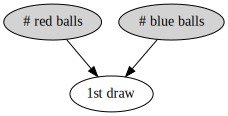

In [9]:
gu1 = Digraph('Urn1')
gu1.node('reds', label='# red balls', style='filled')
gu1.node('blues', label='# blue balls', style='filled')
gu1.node('first', label='1st draw')
gu1.edge('reds', 'first')
gu1.edge('blues', 'first')
gu1.render('urn1_graph', format='png')
gu1

Now, let's say that we draw the first ball.
Let B_1 be the sentence:

> The first ball we draw is blue.

What is the probability of $B_1$?
Our intuition tells us to set:
$$
p(B_1|I) = \frac{4}{10} = \frac{2}{5}.
$$
This is known as the *principle of insufficient reason*.
We can now use the **obvious rule** to find the probability of drawing a red ball, i.e., of $\neg B_1$.
Of course, $\neg B_1$ is just the sentence:

> The first ball we draw is red.

So, let's call it also $R_1$.
It is:
$$
p(R_1|I) = p(\neg B_1|I) = 1 - p(B_1|I) = 1 - \frac{2}{5} = \frac{3}{5}.
$$

Consider the graphical model representation after we observe the first draw?
We need to fill the node corresponding to the first draw with color:

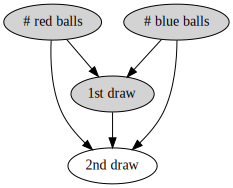

In [10]:
gu3 = Digraph('Urn3')
gu3.node('reds', label='# red balls', style='filled')
gu3.node('blues', label='# blue balls', style='filled')
gu3.node('first', label='1st draw', style='filled')
gu3.node('second', label='2nd draw')
gu3.edge('reds', 'first')
gu3.edge('blues', 'first')
gu3.edge('first', 'second')
gu3.edge('reds', 'second')
gu3.edge('blues', 'second')
gu3.render('urn3_graph', format='png')
gu3

Consider the sentence $R_2$:

> The second ball we draw is red.

What is the probability of $R_2$ given that $B_1$ is true?
We just need to use common sense to find this probability:
+ We had 10 balls, 6 red and 4 blue.
+ Since $B_1$ is true (the first ball was blue), we now have 6 red and 3 blue balls.
+ Therefore, the probability that we draw a red ball next is:
$$
p(R_2|B_1,I) = \frac{6}{9} = \frac{2}{3}.
$$

Similarly, we can find the probability that we draw a red ball in the second draw given that we drew a red ball in the first draw:
+ We had 10 balls, 6 red and 4 blue.
+ Since $R_1$ is true (the first ball is red), we now have 5 red and 4 blue balls.
+ Therefore, the probability that we draw a red ball next is:
$$
p(R_2|R_1,I) = \frac{5}{9}.
$$

Let's consider a second draw without observing the result of the first draw.
What is the graphical causal model now?

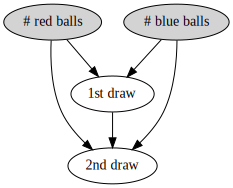

In [11]:
gu2 = Digraph('Urn2')
gu2.node('reds', label='# red balls', style='filled')
gu2.node('blues', label='# blue balls', style='filled')
gu2.node('first', label='1st draw')
gu2.node('second', label='2nd draw')
gu2.edge('reds', 'first')
gu2.edge('blues', 'first')
gu2.edge('first', 'second')
gu2.edge('reds', 'second')
gu2.edge('blues', 'second')
gu2.render('urn2_graph', format='png')
gu2

Let's find the probability that we draw a blue ball in the first draw (A) and a red ball in the second draw (B).
We have to use the **product rule**:
$$
p(B_1, R_2|I) = p(R_2|B_1,I) p(B_1|I) = \frac{2}{3}\frac{2}{5} = \frac{4}{15}.
$$

### Other rules of probability theory

All other rules of probability theory can be derived from the two basic rules.
Here are some examples.

#### Extention of the obvious rule
For any two logical sentences $A$ and $B$ we have:
$$
p(A + B|I) = p(A|I) + p(B|I) - p(AB|I).
$$
In words: the probability of A or B is the probability that A is true plus that probability that B is true minus the probability that both A and B are true.
This is very easy to understand intuitively by looking at the Venn diagram:
![Venn diagram](venn.png)
The probability $p(A+B|I)$ is the area of the uninion of A with B (normalized by I).
This area is indeed the area of A (normalized by I) plus the area of B (normalized by I) minus the area of A and B (normalized by I) which was doublecounted.

Let's see a formal proof of this.
$$
\begin{split}
p(A+B|I) &= 1 - p(\neg (A+B)|I) \\
&= 1 - p(\neg A, \neg B|I)\; \text{(obvious rule)}\\
&= 1 - p(\neg A|\neg B, I)p(\neg B|I)\; \text{(product rule)}\\
&= 1 - \left[1 - p(A|\neg B, I)\right]p(\neg B|I)\; \text{(obvious rule)}\\
&= 1 - p(\neg B|I) + p(A|\neg B, I)p(\neg B|I);\\
&= 1 - p(\neg B|I) + p(A\neg B|I)\; \text{(product rule)}\\
&= 1 - p(\neg B|I) + p(\neg B|A,I) p(A|I)\; \text{(product rule)}\\
&= 1 - p(\neg B|I) + \left[1 - p(B|A,I)\right]p(A|I)\; \text{(obvious rule)}\\
&= 1 - p(\neg B|I) + p(A|I) - p(B|A,I)p(A|I) \\
&= 1 - \left[1 - p(B|I)\right] + p(A|I) - p(B|A,I)p(A|I)\; \text{obvious rule})\\
&= p(A|I) + p(B|I) - p(B|A,I)p(A|I) \\
&= p(A|I) + p(B|I) - p(AB|I)\;\text{(product rule)}.
\end{split}
$$

### The sum rule

This is the final rule we are going to consider in this lecture.
It is one of the most important rules.
**You absolutely have to memorize it.**
It goes as follows.

Consider the sequence of logical sentences $B_1,\dots,B_n$ such that:
+ One of them is definitely true:
$$
p(B_1 + \dots + B_n|I) = 1.
$$
+ They are mutually exclusive:
$$
p(B_iB_j|I) = \delta_{ij} = 
\begin{cases}
    1,  &\;\text{if}\;i=j,\\ 
    0,  &\;\text{otherwise}.
\end{cases}
$$
Then, for any logical sentence $A$ we have:
$$
p(A|I) = \sum_{i=1}^n p(AB_i|I) = \sum_{i=1}^n p(A|B_i,I)p(B_i|I).
$$

Again, this requires a bit of meditation.
You take any logical sentence A and set of exclusive but exhaustive possibilities $B_1,\dots,B_n$ and you break down the probability of $A$ in terms of the probabilities of the $B_i$'s.
The Venn diagrams helps to understand the situation:
![Venn sum rule](venn_sum_rule.png)

The sum rule can be trivially proved by induction using only the obvious rule and the product rule.
It is instructive to go through the proof.
For $n=2$ we have:
$$
\begin{split}
p(A|I) &= p(A\;\text{and}\;(B_1\;\text{or}\;B_2)|I)\\
&= p\left((A\;\text{and}\;B_1)\;\text{or}\;(A\;\text{and}\;B_2)|I\right)\\
&= p(A\;\text{and}\;B_1|I) + p(A\;\text{and}\;B_2|I) - p\left((A\;\text{and}\;B_1)\;\text{or}\;(A\;\text{and}\;B_2)|I\right)\\
&= p(AB_1|I) + p(AB_2|I) - p(AB_1B_2|I)\\
&= p(AB_1|I) + p(AB_2|I),
\end{split}
$$
because 
$$
p(AB_1B_2|I) = p(B_1B_2|I)p(A|I) \le p(B_1B_2|I) = 0.
$$
And then, assume that it holds for $n$, you can easily show that it also holds for $n+1$ completing the proof.

### Example: Drawing balls from a box without replacement (2/3)

Let us consider the probability of getting a red ball in the second draw without observing in the first draw $p(B_1|I)$.
We have two possibilities for the first draw.
We either got a blue ball (B_1 is true) or we got a red ball (R_1 is true).
In other words $B_1$ and $R_1$ cover all possibilities and are mutually exclusive.
We can use the sum rule:
$$
\begin{split}
p(R_2|I) &= p(R_2|B_1,I)p(B_1|I) + p(R_2|R_1,I)p(R_1|I)\\
&= \frac{2}{3}\frac{2}{5} + \frac{5}{9}\frac{3}{5}\\
&= 0.6.
\end{split}
$$

Let's verify this using a Monte Carlo experiment.

In [12]:
def draw_balls_no_replacement(k, num_red, num_blue):
    """
    Draw k balls from an urn without replacement.
    
    :param k: the number of balls to draw
    :param num_red: the number of red balls
    :param num_blue: the number of blue balls
    :return: a k-element list of 'R' and 'B' depending on the draw.
            If k is greater than num_red + num_blue, all the balls are returned.
    """
    balls = ['R'] * num_red + ['B'] * num_blue
    np.random.shuffle(balls)
    drawn_balls = []
    for i in range(k):
        # Pick a ball at random
        ball_id = np.random.randint(0, len(balls))
        ball = balls[ball_id]
        # Remove it from the urn
        balls = balls[:ball_id] + balls[ball_id+1:]
        # Put it in the drawn balls
        drawn_balls.append(ball)
    return drawn_balls

In [13]:
# You can use it like this:
draw_balls_no_replacement(3, 6, 4)

['B', 'B', 'B']

In [14]:
# Now let's draw two balls a few thousand times and count how many times we get a red one
# in the **second** draw
num_samples = 100000
running_sum_of_R2 = 0
for n in range(num_samples):
    balls = draw_balls_no_replacement(2, 6, 4)
    if balls[1] == 'R':
        running_sum_of_R2 += 1
p_R2 = running_sum_of_R2 / num_samples
print('Probability of red on second draw: {0:1.2f}'.format(p_R2))

Probability of red on second draw: 0.60


which matches exactly the theoretical result.

### Questions

+ What is the probability of a blue ball on the second draw $p(B_2|I)$.
Find the theoretical result and then modify the Monte Carlo above to verify it.

### Example: Drawing balls from a box without replacement (3/3)

If you paid close attention, in all our examples the conditioning we did followed the causal links.
For instance, in the urn example we where writing $p(R_2|B_1,I)$ for the probability of getting a red ball in the second draw after having observed the blue ball in the first draw.
This is the uncertainty propagation problem.
However, conditioning on stuff **does not have to follow the causal links**.
It is completely legitimate to ask what is the probability of a blue ball in the first draw given that you have observed that the result of the second draw is a red ball.
The situation is visualized in the following graph:

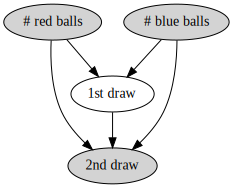

In [15]:
gu4 = Digraph('Urn4')
gu4.node('reds', label='# red balls', style='filled')
gu4.node('blues', label='# blue balls', style='filled')
gu4.node('first', label='1st draw')
gu4.node('second', label='2nd draw', style='filled')
gu4.edge('reds', 'first')
gu4.edge('blues', 'first')
gu4.edge('first', 'second')
gu4.edge('reds', 'second')
gu4.edge('blues', 'second')
gu4.render('urn4_graph', format='png')
gu4

That is, you can write down the mathematical expression $p(B_1|R_2,I)$.
This does not mean that $R_2$ is causing $B_1$.
What happens here is that observing $R_2$ changes your state of knowledge about $B_1$.
This is an example of information flowing in the reverse order of a causal link and a quintessential example of the inverse problem.
Let's solve it analytically:
$$
\begin{split}
p(B_1|R_2,I) &=& \frac{p(B_1,R_2|I)}{p(R_2|I)}\\
&=& \frac{\frac{4}{15}}{0.6}\\
&\approx& 0.44.
\end{split}
$$
This is greater than the probability of drawing a blue ball in the first place, $p(B_1|I) = 0.4$.
Does this make sense?
Yes it does!
Here is how you should think:
+ You draw a ball without seeing it and you put in a box.
+ You draw the second ball and you see that it is a red one.
+ This means that this particular red ball was not picked in the first draw.
+ So, it is as if in the first draw you had one less red to worry about which increases the probability of a blue.
+ So, it is as if you had 5 red balls and 4 blue balls giving you a probability of blue $\frac{4}{9}\approx 0.44$.

This is amazing!
It agrees perfectly with the prediction of the product rule.
This was one of our desiderata (if you compute something in two different ways you should get the same result).
You can rest assured that as soon as you use the product rule and the sum rule and logic, it is impossible to get the wrong answer.
That is, if you can actually carry out the computations.

Let's also verify the result with a Monte Carlo simulation:

In [16]:
num_samples = 100000
running_sum_of_R2 = 0
running_sum_of_B1_given_R2 = 0
for n in range(num_samples):
    balls = draw_balls_no_replacement(2, 6, 4)
    if balls[1] == 'R':
        running_sum_of_R2 += 1
        if balls[0] == 'B':
            running_sum_of_B1_given_R2 += 1
p_B1_given_R2 = running_sum_of_B1_given_R2 / running_sum_of_R2
print('Probability of blue on first draw: {0:1.3f}'.format(p_B1_given_R2))

Probability of blue on first draw: 0.444


### Questions

+ Work out theoretically $p(R_1|B_2,I)$.
+ Verify your result by modifying the Monte Carlo procedure above.